In [1]:
import pandas as pd
import json
import os
from datetime import date

# Collecting the data from Twitter

In [2]:
# Import the Twython class
from twython import Twython
import json

# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

# Instantiate an object
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])


In [6]:
import pysad

In [76]:
import importlib
importlib.reload(pysad)

<module 'pysad' from '/home/benjamin/Documents/EPFL/Research/sad/sad_tweets/pysad.py'>

In [45]:
init_accounts = pysad.initial_accounts()

In [46]:
init_accounts.list()

['swiss_climate_regular',
 'swiss_climate_controversial',
 'swiss_immigration',
 'french_tech_lesechos']

In [162]:

    
######Choose a category##############    
#category_name = 'swiss_climate_controversial'
category_name = 'swiss_climate_regular'
#category_name = 'french_tech_lesechos'
#category_name = 'swiss_immigration'
#####################################

username_list = init_accounts.accounts(category_name)

# create the path to save the experiment indexed with a date
today = date.today()
date_string = today.strftime("%Y%m%d")
print("date string =", date_string)

#date_string = '191128'

data_path = category_name + '/' + date_string+ '/'
#get_tweets = python_tweets.get_user_timeline(screen_name = username,  
#                                           count = 200, include_rts = True)
if not os.path.isdir(category_name):
    os.mkdir(category_name)
    print('Path created:',category_name)
if not os.path.isdir(data_path):
    os.mkdir(data_path)
    print('Path created:',data_path)

date string = 20200120
Path created: swiss_climate_regular
Path created: swiss_climate_regular/20200120/


In [163]:
min_mentions = 2 # minimal number of mentions of a user to be followed
max_day_old = 7 # number max of days in the past
exploration_depth = 3 # mention of mention of mention of ... up to exploration depth

In [164]:
total_user_list = pysad.collect_tweets(username_list, data_path, python_tweets, min_mentions=min_mentions,
               max_day_old=max_day_old, exploration_depth=exploration_depth)

  0%|          | 0/16 [00:00<?, ?it/s]

Threshold set to 2 mentions.

******* Processing users at 0-hop distance *******


 25%|██▌       | 4/16 [00:03<00:10,  1.12it/s]

Empty tweet list. Processing stopped for user  EperonP


 31%|███▏      | 5/16 [00:04<00:09,  1.15it/s]

Empty tweet list. Processing stopped for user  MathiasTemujin


 44%|████▍     | 7/16 [00:05<00:07,  1.19it/s]

Empty tweet list. Processing stopped for user  AlimEquitables


 56%|█████▋    | 9/16 [00:07<00:05,  1.23it/s]

Empty tweet list. Processing stopped for user  vertliberaux


  0%|          | 0/28 [00:00<?, ?it/s]


******* Processing users at 1-hop distance *******


  4%|▎         | 1/28 [00:00<00:17,  1.51it/s]

Empty tweet list. Processing stopped for user  PriseDeTerre


 25%|██▌       | 7/28 [00:05<00:15,  1.35it/s]

Empty tweet list. Processing stopped for user  CreditSuisse


 79%|███████▊  | 22/28 [00:17<00:04,  1.27it/s]

Empty tweet list. Processing stopped for user  rogerfederer


  0%|          | 0/57 [00:00<?, ?it/s]


******* Processing users at 2-hop distance *******


 37%|███▋      | 21/57 [00:15<00:26,  1.35it/s]

Empty tweet list. Processing stopped for user  RTBFinfo


 63%|██████▎   | 36/57 [00:26<00:15,  1.34it/s]

Empty tweet list. Processing stopped for user  NZZWissen


100%|██████████| 57/57 [00:43<00:00,  1.32it/s]

Total number of users collected:
252 252


# Loading the saved data into an edge table

In [165]:
import glob

edge_df = pd.DataFrame()
for filename in glob.glob(data_path + '*_mentions' +'_t' +str(min_mentions)+ '.csv'):
    new_edge_df = pd.read_csv(filename)
    print('{} with {} tweets.'.format(filename,len(new_edge_df)))
    edge_df = edge_df.append(new_edge_df)
    

swiss_climate_regular/20200120/audreygarric_mentions_t2.csv with 18 tweets.
swiss_climate_regular/20200120/MMarendaz_mentions_t2.csv with 53 tweets.
swiss_climate_regular/20200120/jeanpierredenis_mentions_t2.csv with 52 tweets.
swiss_climate_regular/20200120/lemondefr_mentions_t2.csv with 19 tweets.
swiss_climate_regular/20200120/24heuresch_mentions_t2.csv with 44 tweets.
swiss_climate_regular/20200120/proclimCH_mentions_t2.csv with 1 tweets.
swiss_climate_regular/20200120/lecourrier_mentions_t2.csv with 6 tweets.
swiss_climate_regular/20200120/MarcFelixSerrao_mentions_t2.csv with 36 tweets.
swiss_climate_regular/20200120/heidi_news_mentions_t2.csv with 40 tweets.
swiss_climate_regular/20200120/IPBES_mentions_t2.csv with 76 tweets.
swiss_climate_regular/20200120/miseaupoint_mentions_t2.csv with 2 tweets.
swiss_climate_regular/20200120/XLanata_mentions_t2.csv with 15 tweets.
swiss_climate_regular/20200120/RadioTeleSuisse_mentions_t2.csv with 14 tweets.
swiss_climate_regular/20200120/KBu

In [166]:
# display edges with number of hashtags >1
edge_df[edge_df['hashtags'].apply(lambda x : len(x.split()))>1]

,Unnamed: 0,user,mention,weight,hashtags,date,urls
12,12,audreygarric,lemondefr,3,"['JournéeSpéciale', 'Australie', 'Australie']","['2020-01-17 09:49:28', '2020-01-17 09:47:24',...",['https://twitter.com/lemondefr/status/1218085...
13,13,audreygarric,olivier_fontan,1,"['carbone', 'pétrole']",['2020-01-20 14:01:58'],[]
14,14,audreygarric,pierrecannet,1,"['climat', 'biodiversité']",['2020-01-16 14:00:39'],[]
0,0,MMarendaz,19h30RTS,2,"['OKboomer', 'boomer']","['2020-01-15 14:14:09', '2020-01-15 14:11:40']",[]
7,7,MMarendaz,Deputee_Obono,1,"['BouffesDuNord', 'TahaBouhafs']",['2020-01-19 18:03:05'],[]
...,...,...,...,...,...,...,...
2,2,350Europe,BaillieGifford,2,"['ClimateBreakdown', 'EndFossilFinance', 'Clim...","['2020-01-15 15:00:20', '2020-01-14 09:20:26']",['https://www.bbc.co.uk/news/uk-scotland-edinb...
3,3,350Europe,Channel4,5,"['DropBP', 'DropBP', 'DropBP', 'DropBP', 'Drop...","['2020-01-19 17:00:07', '2020-01-18 10:00:22',...",['https://act.350.org/sign/channel-4-drop-bp-p...
9,9,350Europe,ScotlandXr,1,"['ClimateBreakdown', 'EndFossilFinance']",['2020-01-15 15:00:20'],['https://www.bbc.co.uk/news/uk-scotland-edinb...
12,12,350Europe,billmckibben,4,"['ClimateBreakdown', 'EndFossilFinance']","['2020-01-14 15:18:03', '2020-01-14 15:17:33',...",['https://www.ran.org/wp-content/uploads/2019/...


In [169]:
DEGREE_MIN = 2 # Minimal number of connections in the graph

G = pysad.graph_from_edgeslist(edge_df,DEGREE_MIN)

Creating the graph from the edge list
Nb of nodes: 1903
Nb of nodes after removing nodes with degree strictly smaller than 2: 398
removed 0 isolated nodes.


## Community detection

In [170]:
G,clusters = pysad.detect_communities(G)

Communities saved on the graph as node attributes.
Nb of partitions: 9


In [104]:
import numpy as np
import matplotlib.pyplot as plt

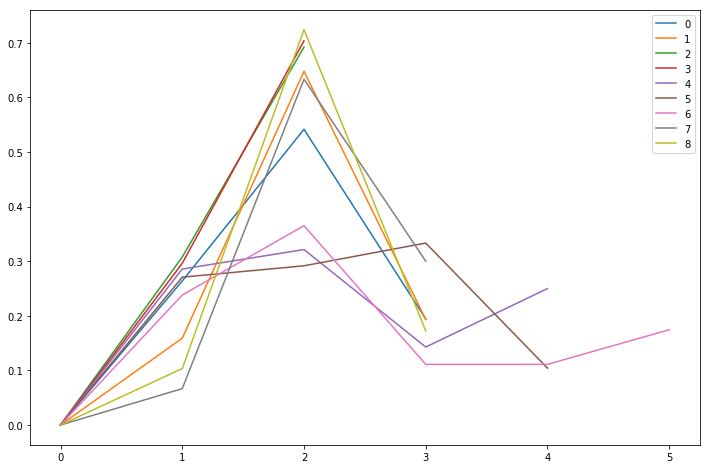

In [172]:
plt.figure(figsize=(12,8))
cluster_prop_dic = {}
for c in clusters:
    gc = clusters[c]
    gc_size = gc.number_of_nodes()
    ck = nx.algorithms.core.core_number(gc)
    max_k = max(ck.values())
    kcurve = [len([key for (key,value) in ck.items() if value==idx]) for idx in range(max_k+1)]
    in_diversity = gc.number_of_edges()/gc_size
    in_activity = gc.size(weight='weight')/gc_size
    cluster_prop_dic[c] = [gc_size, max_k, max(kcurve),max(kcurve)/gc_size,
                           in_diversity,in_activity,in_diversity*in_activity]
    #print(c, gc_size, max_k, max(kcurve),max(kcurve)/gc_size, gc.number_of_edges()/gc_size,gc.size(weight='weight')/gc_size)
    plt.plot(np.array(kcurve)/gc_size,label=c)
    plt.legend()

In [173]:
cluster_prop_df = pd.DataFrame.from_dict(cluster_prop_dic,orient='index',columns=['nb nodes','k max','largest shell','normalized shell','in_diversity','in_activity','activism'])

In [174]:
cluster_prop_df.sort_values(by='activism',ascending=False)

,nb nodes,k max,largest shell,normalized shell,in_diversity,in_activity,activism
4,28,4,9,0.321429,2.000000,9.928571,19.857143
6,63,5,23,0.365079,2.269841,5.698413,12.934492
8,29,3,21,0.724138,1.827586,5.206897,9.516052
5,48,4,16,0.333333,2.000000,3.854167,7.708333
7,30,3,19,0.633333,1.733333,4.400000,7.626667
1,88,3,57,0.647727,1.965909,2.920455,5.741348
2,13,2,9,0.692308,1.461538,3.153846,4.609467
3,27,2,19,0.703704,1.407407,3.111111,4.378601
0,72,3,39,0.541667,1.708333,2.513889,4.294560


In [175]:
cluster_prop_df.sort_values(by='in_diversity',ascending=False)

,nb nodes,k max,largest shell,normalized shell,in_diversity,in_activity,activism
6,63,5,23,0.365079,2.269841,5.698413,12.934492
4,28,4,9,0.321429,2.000000,9.928571,19.857143
5,48,4,16,0.333333,2.000000,3.854167,7.708333
1,88,3,57,0.647727,1.965909,2.920455,5.741348
8,29,3,21,0.724138,1.827586,5.206897,9.516052
7,30,3,19,0.633333,1.733333,4.400000,7.626667
0,72,3,39,0.541667,1.708333,2.513889,4.294560
2,13,2,9,0.692308,1.461538,3.153846,4.609467
3,27,2,19,0.703704,1.407407,3.111111,4.378601


In [176]:
graphname = 'AAgraph'
#graphname = 'GBRgraph'

In [177]:
# Save the graph
import networkx as nx

graphfilename = data_path + graphname + '_t' + str(min_mentions) + '_md' + str(DEGREE_MIN) +'_graph.gexf'
nx.write_gexf(G,graphfilename)
print('Wrote',graphfilename)

Wrote swiss_climate_regular/20200120/AAgraph_t2_md2_graph.gexf


# Hashtags, dates and urls
Hashtags, dates and urls are on the edges of the network.
We can get the most common hashtags within a community and also betwenn communities using the edges that connect them.

In [178]:
tags_dic, dates_dic, url_dic = pysad.community_data(G)

In [179]:
community_table = pysad.communities_date_hashtags(dates_dic, tags_dic)
community_table

,Community,Average date,Deviation (days),hashtag0,hashtag1,hashtag2,hashtag3,hashtag4
0,0,2020-01-17,1,Municipales2020,Australie,Besançon,JournéeSpéciale,Greenbashing
1,1,2020-01-17,1,FridaysForFuture,ClimateStrike,schoolstrike4climate,Saarland,Mainz
2,2,2020-01-15,1,LaTac,PassoiresThermiques,NeutralitéCarbone,croissance,EfficacitéEnergétique
3,3,2020-01-18,1,RTSsport,Lausanne,Election2020,LuandaLeaks,JOJ2020
4,4,2020-01-18,1,boomer,neutralite,servicepublic,UNILDurable,procèsdeLausanne
5,5,2020-01-17,1,ClimateStrike,suisse,SuzetteSandoz,Lausanne,ClimateChange
6,6,2020-01-16,1,lausanne,Lausanne,climatestrike,ClimateStrike,climat
7,7,2020-01-19,1,WEF2020,LibyenKonferenz,LuandaLeaks,AusOpen,Kohleausstieg
8,8,2020-01-18,1,wef20,nature,Biodiversity2020,NatureCrisis,BiodiversityLoss


In [180]:
community_table['activism'] = cluster_prop_df['activism']
community_table['nb nodes'] = cluster_prop_df['nb nodes']

In [181]:
community_table.sort_values('activism',ascending=False).drop(['Average date','Deviation (days)'],axis=1)

,Community,hashtag0,hashtag1,hashtag2,hashtag3,hashtag4,activism,nb nodes
4,4,boomer,neutralite,servicepublic,UNILDurable,procèsdeLausanne,19.857143,28
6,6,lausanne,Lausanne,climatestrike,ClimateStrike,climat,12.934492,63
8,8,wef20,nature,Biodiversity2020,NatureCrisis,BiodiversityLoss,9.516052,29
5,5,ClimateStrike,suisse,SuzetteSandoz,Lausanne,ClimateChange,7.708333,48
7,7,WEF2020,LibyenKonferenz,LuandaLeaks,AusOpen,Kohleausstieg,7.626667,30
1,1,FridaysForFuture,ClimateStrike,schoolstrike4climate,Saarland,Mainz,5.741348,88
2,2,LaTac,PassoiresThermiques,NeutralitéCarbone,croissance,EfficacitéEnergétique,4.609467,13
3,3,RTSsport,Lausanne,Election2020,LuandaLeaks,JOJ2020,4.378601,27
0,0,Municipales2020,Australie,Besançon,JournéeSpéciale,Greenbashing,4.294560,72


In [182]:
community_table[['Community', 'nb nodes', 'activism', 'hashtag0', 'hashtag1', 'hashtag2', 'hashtag3', 'hashtag4']].sort_values('activism',ascending=False)

,Community,nb nodes,activism,hashtag0,hashtag1,hashtag2,hashtag3,hashtag4
4,4,28,19.857143,boomer,neutralite,servicepublic,UNILDurable,procèsdeLausanne
6,6,63,12.934492,lausanne,Lausanne,climatestrike,ClimateStrike,climat
8,8,29,9.516052,wef20,nature,Biodiversity2020,NatureCrisis,BiodiversityLoss
5,5,48,7.708333,ClimateStrike,suisse,SuzetteSandoz,Lausanne,ClimateChange
7,7,30,7.626667,WEF2020,LibyenKonferenz,LuandaLeaks,AusOpen,Kohleausstieg
1,1,88,5.741348,FridaysForFuture,ClimateStrike,schoolstrike4climate,Saarland,Mainz
2,2,13,4.609467,LaTac,PassoiresThermiques,NeutralitéCarbone,croissance,EfficacitéEnergétique
3,3,27,4.378601,RTSsport,Lausanne,Election2020,LuandaLeaks,JOJ2020
0,0,72,4.294560,Municipales2020,Australie,Besançon,JournéeSpéciale,Greenbashing


### Process the urls

In [ ]:
url_table = pysad.communities_urls(url_dic)
url_table = pysad.convert_bitly(url_table)
filtered_url_table = pysad.drop_twitter_urls(url_table)

In [ ]:
url_table

# Sort users by community and save in a excel sheet

In [ ]:
# Sort users by community and store their node degree (importance)
community_nodes = {}
for node,data in G.nodes(data=True):
    community_nb = data['community']
    if  community_nb not in community_nodes:
        community_nodes[community_nb] = [(node, G.degree(node))]
    else:
        community_nodes[community_nb].append((node, G.degree(node)))


# Display the exmaple of community c_idx
#c_idx = 0
#ddf = pd.DataFrame(community_nodes[c_idx],columns=['User','Degree'])
#print('list of most connected users in community',c_idx)
#ddf.sort_values(by='Degree',ascending=False).head(20)

In [ ]:
# Save to an excel file
with pd.ExcelWriter(data_path + 'graph_infos.xlsx') as writer:
    for community_nb in community_nodes:
        ddf = pd.DataFrame(community_nodes[community_nb],columns=['User','Degree'])
        ddf = ddf.sort_values(by='Degree',ascending=False)#.head(20)
        ddf.to_excel(writer, sheet_name='Community_' + str(community_nb),index=False)
    community_table.to_excel(writer, sheet_name='Hashtags',index=False)
    #users_df.to_excel(writer, sheet_name='Initial_users_details',index=False)
    filtered_url_table.to_excel(writer, sheet_name='List_of_urls',index=False)
    # Set the column width
    column_width = 25
    for sheet in writer.sheets: 
        worksheet = writer.sheets[sheet]
        for col in ['A','B','C','D','E','F','G','H']:
            worksheet.column_dimensions[col].width = column_width
    writer.sheets['List_of_urls'].column_dimensions['A'].width = 100